# Spaceship Titanic - Passenger Transportation Prediction

This project demonstrates data preprocessing and machine learning classification to predict passenger transportation status using the Spaceship Titanic dataset.

<div class="alert alert-block alert-info">
    1. Import <b>Libraries</b>
</div>

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import os

<div class="alert alert-block alert-info">
    2. <b>Data Loading/Reading</b>
</div>

In [3]:
df = pd.read_csv("train.csv")
print("Data loaded successfully!")

Data loaded successfully!


<div class="alert alert-block alert-info">
    3. <b>Data Exploration</b>
</div>

In [4]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.tail(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [6]:
df.shape

(8693, 14)

In [7]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
df.count()

PassengerId     8693
HomePlanet      8492
CryoSleep       8476
Cabin           8494
Destination     8511
Age             8514
VIP             8490
RoomService     8512
FoodCourt       8510
ShoppingMall    8485
Spa             8510
VRDeck          8505
Name            8493
Transported     8693
dtype: int64

In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
print(f"Number of Rows: {df.shape[0]} and Number of Columns: {df.shape[1]}")

Number of Rows: 8693 and Number of Columns: 14


In [12]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [13]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [14]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<div class="alert alert-block alert-info">
    4. <b>Data Pre-Processing</b>
</div>

<div class="alert alert-block alert-warning">
    4.1. <b>Manage Null Values</b>
</div>

In [15]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [16]:
df['RoomService'].mean()

np.float64(224.687617481203)

In [17]:
df['RoomService'].median()

0.0

In [18]:
df['RoomService'].mode().iloc[0]

np.float64(0.0)

In [19]:
def fillnaObjectMode(cols):
    for col in cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
object_cols = [
    'HomePlanet', 'Destination', 'Cabin', 'CryoSleep', 'VIP'
]
fillnaObjectMode(object_cols)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2464\4251868135.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')


In [20]:
def fillnaNumericMedian(cols):
    for col in cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median() if not np.isnan(df[col].median()) else 0)
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fillnaNumericMedian(numeric_cols)
print("\nNull Values After Filling:")
print(df.isnull().sum())


Null Values After Filling:
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


<div class="alert alert-block alert-warning">
    4.2. <b>Manage Data Types</b>
</div>

In [21]:
def CHANGEFLOATTOINT(cols):
    for i in cols:
        df[i] = df[i].astype('int32')

int_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
CHANGEFLOATTOINT(int_columns)

In [22]:
def CHANGEObjectTOINT(cols):
    for i in cols:
        if i in df.columns:
            data = pd.DataFrame({i: df[i].unique()})
            data_LE = LabelEncoder()
            data_LE.fit(np.ravel(data))
            df[i] = data_LE.transform(df[i])

categorical_columns = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Cabin']
CHANGEObjectTOINT(categorical_columns)
df['Transported'] = df['Transported'].astype('int32')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int64
 1   CryoSleep     8693 non-null   int64
 2   Cabin         8693 non-null   int64
 3   Destination   8693 non-null   int64
 4   Age           8693 non-null   int32
 5   VIP           8693 non-null   int64
 6   RoomService   8693 non-null   int32
 7   FoodCourt     8693 non-null   int32
 8   ShoppingMall  8693 non-null   int32
 9   Spa           8693 non-null   int32
 10  VRDeck        8693 non-null   int32
 11  Transported   8693 non-null   int32
dtypes: int32(7), int64(5)
memory usage: 577.4 KB


In [24]:
df.head(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39,0,0,0,0,0,0,0
1,0,0,2184,2,24,0,109,9,25,549,44,1


In [25]:
df.drop(['Cabin'], axis=1, inplace=True)
df.to_csv('processed_data.csv', index=False, header=True)

In [26]:
df = pd.read_csv('processed_data.csv')

In [27]:
print(os.getcwd())  
print(os.listdir())

s:\SEMESTER 4\Programming for AI(lab)\Task\Task 02\spaceship-titanic
['.conda', 'create_word_report.py', 'model_rf.pkl', 'processed_data.csv', 'PROJECT_REPORT.docx', 'README.md', 'spaceship.ipynb', 'test.csv', 'train.csv', '~$OJECT_REPORT.docx']


<div class="alert alert-block alert-info">
    5. <b>Train - Test Splitting</b>
</div>

In [28]:
df = pd.read_csv('processed_data.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int64
 1   CryoSleep     8693 non-null   int64
 2   Destination   8693 non-null   int64
 3   Age           8693 non-null   int64
 4   VIP           8693 non-null   int64
 5   RoomService   8693 non-null   int64
 6   FoodCourt     8693 non-null   int64
 7   ShoppingMall  8693 non-null   int64
 8   Spa           8693 non-null   int64
 9   VRDeck        8693 non-null   int64
 10  Transported   8693 non-null   int64
dtypes: int64(11)
memory usage: 747.2 KB


In [30]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [31]:
X = df.drop('Transported', axis=1)   
Y = df['Transported']

In [32]:
train_x, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42, stratify=Y)

In [33]:
print(train_x.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(6954, 10) (6954,)
(1739, 10) (1739,)


<div class="alert alert-block alert-info">
    6. <b>Applying Classifier / Model Training</b>
</div>

In [35]:
model_rf = RandomForestClassifier(n_estimators=500, max_depth=11, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', random_state=42, n_jobs=-1)

In [36]:
model_rf.fit(train_x, train_y)
print("RandomForest Model trained successfully!")

RandomForest Model trained successfully!


In [37]:
predictions = model_rf.predict(test_X)
model_pred_rf = predictions
print("Predictions made!")

Predictions made!


In [38]:
accuracy = accuracy_score(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
f1 = f1_score(test_y, predictions)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print("\nClassification Report:")
print(classification_report(test_y, predictions))

Accuracy: 0.800
Precision: 0.793
Recall: 0.815
F1-Score: 0.804

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       863
           1       0.79      0.82      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [39]:
model_acc_rf = accuracy
print(f"Final Model Accuracy: {round(model_acc_rf, 2)*100:.0f}%")

Final Model Accuracy: 80%


<div class="alert alert-block alert-success">
    6.1. <b>Model Evaluation Graph</b>
</div>

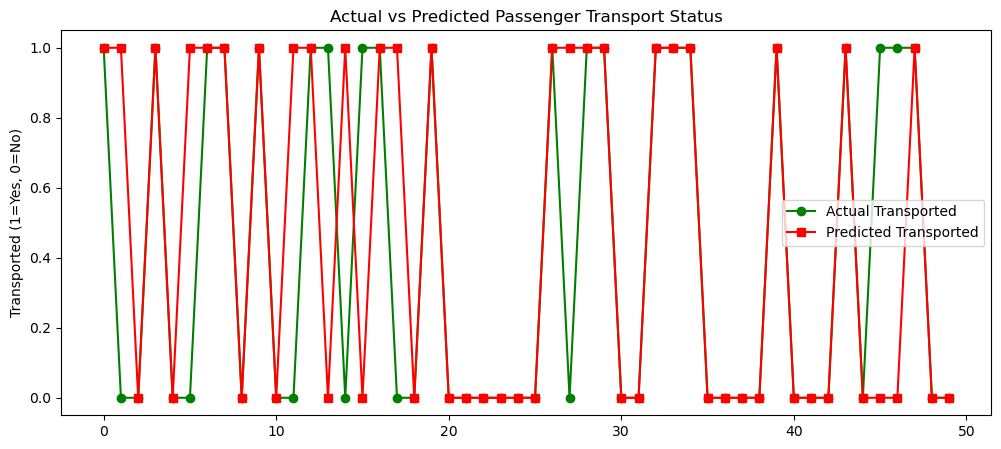

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(test_y.values[:50], color='green', marker='o', label='Actual Transported')
plt.plot(predictions[:50], color='red', marker='s', label='Predicted Transported')
plt.ylabel('Transported (1=Yes, 0=No)')
plt.title('Actual vs Predicted Passenger Transport Status')
plt.legend()
plt.show()

In [41]:
pickle.dump(model_rf, open('model_rf.pkl', 'wb'))

In [42]:
model_rf = pickle.load(open('model_rf.pkl', 'rb'))